### Reading and Summarizing Data

In [1]:
import pandas as pd
import pyarrow as pa
from pyarrow.parquet import ParquetFile

data_dir = "../data/"

Let's first start by checking out the data given to us in the challenge. This includes the file for differential expressions (given in log fold change I think), the raw counts for expressions and the multiomics of the cells at baseline.

In [2]:
diff_exp_df = pd.read_parquet(f"{data_dir}de_train.parquet")
diff_exp_df.head()

,cell_type,sm_name,sm_lincs_id,SMILES,control,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
0,NK cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.104720,-0.077524,-1.625596,-0.144545,0.143555,...,-0.227781,-0.010752,-0.023881,0.674536,-0.453068,0.005164,-0.094959,0.034127,0.221377,0.368755
1,T cells CD4+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.915953,-0.884380,0.371834,-0.081677,-0.498266,...,-0.494985,-0.303419,0.304955,-0.333905,-0.315516,-0.369626,-0.095079,0.704780,1.096702,-0.869887
2,T cells CD8+,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,-0.387721,-0.305378,0.567777,0.303895,-0.022653,...,-0.119422,-0.033608,-0.153123,0.183597,-0.555678,-1.494789,-0.213550,0.415768,0.078439,-0.259365
3,T regulatory cells,Clotrimazole,LSM-5341,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,False,0.232893,0.129029,0.336897,0.486946,0.767661,...,0.451679,0.704643,0.015468,-0.103868,0.865027,0.189114,0.224700,-0.048233,0.216139,-0.085024
4,NK cells,Mometasone Furoate,LSM-3349,C[C@@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C...,False,4.290652,-0.063864,-0.017443,-0.541154,0.570982,...,0.758474,0.510762,0.607401,-0.123059,0.214366,0.487838,-0.819775,0.112365,-0.122193,0.676629


In [3]:
diff_exp_summary = diff_exp_df.describe()
diff_exp_summary

,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,AAK1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.366769,0.250951,0.148259,0.155733,0.684275,0.946273,0.000582,0.348203,0.009424,0.062662,...,0.071179,0.159252,0.018584,0.267114,0.497043,0.382672,0.240726,0.161087,-0.160735,-0.071255
std,1.634697,1.188660,2.275410,2.184095,3.189206,3.826391,0.703410,1.259422,0.952243,1.237806,...,1.028842,1.128245,1.333236,1.439952,1.691722,1.430553,0.918039,0.779918,0.932961,0.748377
min,-3.258689,-4.067518,-28.552191,-17.801989,-6.378904,-6.908058,-3.167504,-2.825505,-3.654218,-8.042101,...,-4.309438,-4.276411,-21.273505,-5.520507,-6.780020,-2.617712,-8.310726,-3.456731,-7.189487,-4.819105
25%,-0.215161,-0.267728,-0.230129,-0.229460,-0.190989,-0.123963,-0.261792,-0.197019,-0.356774,-0.214164,...,-0.349490,-0.289498,-0.421265,-0.275030,-0.119912,-0.135779,-0.141982,-0.169364,-0.479099,-0.402733
50%,0.082722,0.102076,0.044717,0.036156,0.116411,0.131515,0.009045,0.144223,-0.028306,0.068134,...,0.010186,0.063539,-0.010158,0.065780,0.148876,0.145279,0.137559,0.062804,-0.083260,-0.058601
75%,0.528015,0.523162,0.405858,0.532216,0.616725,0.580870,0.268029,0.560221,0.253911,0.413308,...,0.330117,0.479763,0.361876,0.482989,0.683587,0.600652,0.510566,0.487592,0.266170,0.252387
max,22.085428,14.421991,27.557166,27.603715,35.278040,34.785942,5.079223,15.589494,10.855080,6.518868,...,10.803264,15.959706,10.649018,17.231287,23.721492,23.089832,10.844942,4.822008,7.826692,3.534737


We'll be using pyarrow ParquetFile class to avoid running out of memory when using multiome and adata (raw expression) parquet files.

In [4]:
raw_expression_meta = pd.read_csv(f"{data_dir}/adata_obs_meta.csv")
raw_expression_meta.head()

,obs_id,library_id,plate_name,well,row,col,cell_id,donor_id,cell_type,sm_lincs_id,sm_name,SMILES,dose_uM,timepoint_hr,control
0,000006a87ba75b72,library_4,plate_4,F7,F,7,PBMC,donor_2,T cells CD4+,LSM-4944,MLN 2238,CC(C)C[C@H](NC(=O)CNC(=O)c1cc(Cl)ccc1Cl)B(O)O,1.0,24,False
1,0000233976e3cd37,library_0,plate_3,D4,D,4,PBMC,donor_1,T cells CD4+,LSM-46203,BMS-265246,CCCCOc1c(C(=O)c2c(F)cc(C)cc2F)cnc2[nH]ncc12,1.0,24,False
2,0001533c5e876362,library_2,plate_0,B11,B,11,PBMC,donor_0,T regulatory cells,LSM-45663,Resminostat,CN(C)Cc1ccc(S(=O)(=O)n2ccc(/C=C/C(=O)NO)c2)cc1,1.0,24,False
3,00022f989630d14b,library_35,plate_2,E6,E,6,PBMC,donor_0,T cells CD4+,LSM-43216,FK 866,O=C(/C=C/c1cccnc1)NCCCCC1CCN(C(=O)c2ccccc2)CC1,1.0,24,False
4,0002560bd38ce03e,library_22,plate_4,B6,B,6,PBMC,donor_2,T cells CD4+,LSM-1099,Nilotinib,Cc1cn(-c2cc(NC(=O)c3ccc(C)c(Nc4nccc(-c5cccnc5)...,1.0,24,False


In [5]:
raw_expression_meta.describe()

,col,dose_uM,timepoint_hr
count,240090.00000,240090.000000,240090.0
mean,6.05665,2.462781,24.0
std,3.55246,4.276144,0.0
min,1.00000,0.100000,24.0
25%,3.00000,1.000000,24.0
50%,6.00000,1.000000,24.0
75%,9.00000,1.000000,24.0
max,12.00000,14.100000,24.0


In [6]:
raw_expression_file = ParquetFile("../data/adata_train.parquet")
raw_expression_file.metadata

  created_by: Arrow2 - Native Rust implementation of Arrow
  num_columns: 4
  num_rows: 416442312
  num_row_groups: 1588
  format_version: 2.6
  serialized_size: 390097

In [7]:
raw_expression_df_sample = raw_expression_file.read_row_group(0).to_pandas()
raw_expression_df_sample.head()

,obs_id,gene,count,normalized_count
0,000006a87ba75b72,AATF,1,5.567933
1,000006a87ba75b72,ABHD12,1,5.567933
2,000006a87ba75b72,ABHD3,1,5.567933
3,000006a87ba75b72,AC004687.1,1,5.567933
4,000006a87ba75b72,AC009779.2,1,5.567933


In [8]:
raw_expression_df_sample[["count", "normalized_count"]].describe()

,count,normalized_count
count,262243.000000,262243.000000
mean,3.380121,5.603679
std,12.802331,0.933460
min,1.000000,3.783720
25%,1.000000,5.092920
50%,1.000000,5.416387
75%,2.000000,5.877022
max,1186.000000,11.850286


In [9]:
multiome_obs_meta = pd.read_csv(f"{data_dir}/multiome_obs_meta.csv")
multiome_obs_meta.head()

,obs_id,cell_type,donor_id
0,000225c1151ab841,B cells,donor_0
1,0003c40a54367871,T cells CD4+,donor_2
2,0004bf574b822c3c,T cells CD4+,donor_2
3,000d59b5478f28e2,B cells,donor_0
4,0011b7473923d7b5,NK cells,donor_2


In [10]:
multiome_var_meta = pd.read_csv(f"{data_dir}/multiome_var_meta.csv")
multiome_var_meta.head()

,location,gene_id,feature_type,genome,interval
0,A1BG,ENSG00000121410,Gene Expression,GRCh38,chr19:58353491-58353492
1,A1BG-AS1,ENSG00000268895,Gene Expression,GRCh38,chr19:58347750-58351970
2,A2M,ENSG00000175899,Gene Expression,GRCh38,chr12:9116156-9116157
3,A2M-AS1,ENSG00000245105,Gene Expression,GRCh38,chr12:9065162-9065177
4,A2ML1,ENSG00000166535,Gene Expression,GRCh38,chr12:8822620-8845004


In [11]:
multiome_file = ParquetFile(f"{data_dir}/multiome_train.parquet")
multiome_df_sample = multiome_file.read_row_group(0).to_pandas()
multiome_df_sample.head()

,obs_id,location,count,normalized_count
0,000225c1151ab841,AAMP,1,6.320659
1,000225c1151ab841,AASS,1,6.320659
2,000225c1151ab841,ABCC11,1,6.320659
3,000225c1151ab841,ABCC2,1,6.320659
4,000225c1151ab841,ABR,1,6.320659


In [12]:
multiome_df_sample[["count", "normalized_count"]].describe()

,count,normalized_count
count,262440.000000,262440.000000
mean,2.354100,2.207374
std,2.655962,2.096967
min,1.000000,0.056986
25%,2.000000,0.702835
50%,2.000000,1.227138
75%,2.000000,2.943968
max,491.000000,12.740170


### Checking Out Submission Inputs and Format

In [13]:
pd.read_csv(f"{data_dir}/sample_submission.csv", index_col="id")

,A1BG,A1BG-AS1,A2M,A2M-AS1,A2MP1,A4GALT,AAAS,AACS,AAGAB,AAK1,...,ZUP1,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
pd.read_csv(f"{data_dir}/id_map.csv")

,id,cell_type,sm_name
0,0,B cells,5-(9-Isopropyl-8-methyl-2-morpholino-9H-purin-...
1,1,B cells,ABT-199 (GDC-0199)
2,2,B cells,ABT737
3,3,B cells,AMD-070 (hydrochloride)
4,4,B cells,AT 7867
...,...,...,...
250,250,Myeloid cells,Vandetanib
251,251,Myeloid cells,Vanoxerine
252,252,Myeloid cells,Vardenafil
253,253,Myeloid cells,Vorinostat


### Small Molecules - In Depth

Let's create a dataframe of all the small molecules present in the study and analyze them using RDKit.

In [32]:
from rdkit import Chem
from rdkit.Chem import AllChem, PandasTools, Draw, Descriptors

In [19]:
sm_df = pd.read_parquet(f"{data_dir}de_train.parquet")[["sm_name", "SMILES", "control"]]
sm_df.drop_duplicates(inplace=True)
print(f"Number of small molecules: {sm_df.shape[0]}")

Number of small molecules: 146


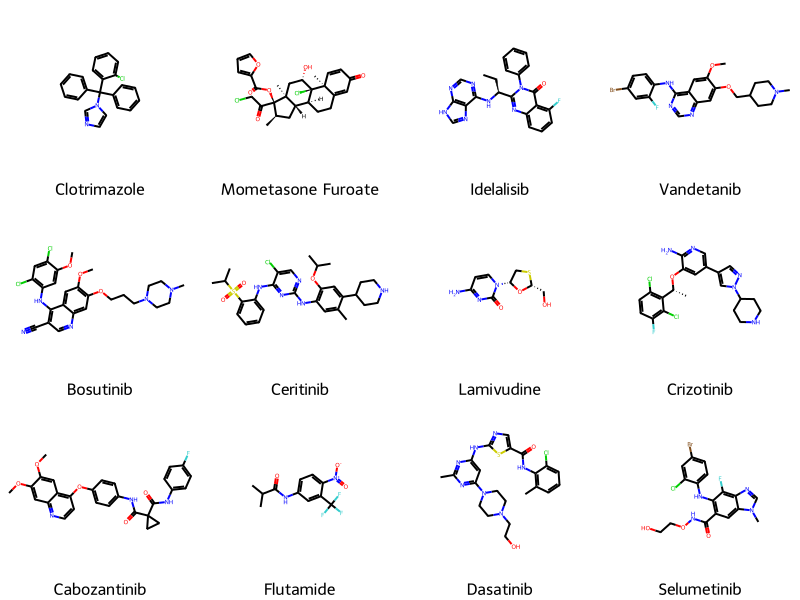

In [31]:
# Create Mol objects and add them to dataframe + visualize a sample
PandasTools.AddMoleculeColumnToFrame(sm_df, smilesCol="SMILES", molCol="mol", 
                                     includeFingerprints=True)
PandasTools.FrameToGridImage(sm_df.head(12), column="mol", legendsCol="sm_name", molsPerRow=4)

array([[<Axes: title={'center': 'mw'}>, <Axes: title={'center': 'logp'}>]],
      dtype=object)

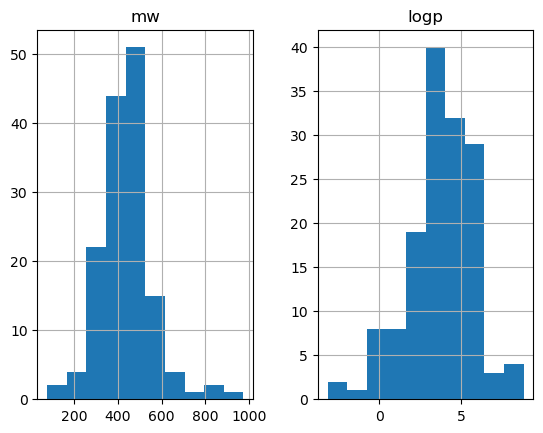

In [39]:
sm_df['mw'] = sm_df['mol'].map(Descriptors.MolWt)
sm_df['logp'] = sm_df['mol'].map(Descriptors.MolLogP)
sm_df.hist(["mw", "logp"])

#### Fingerprints...

Next we will try to visualize the molecules present in the study in a 3D chemical space. In this section, we will be using fingerprints to see if how differentiate between molecules.

In [156]:
import numpy as np
def construct_morgan(mol, radius=2, vecSize=2048):
    return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=vecSize))

sm_df["morgan_fps"] = sm_df["mol"].map(construct_morgan)

In [157]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:
mol_fps_array = np.stack(sm_df["morgan_fps"].to_numpy())
control_idx = sm_df[sm_df["control"]==True].reset_index().index

pca = PCA(n_components=3)
pca_mols = pca.fit_transform(mol_fps_array)

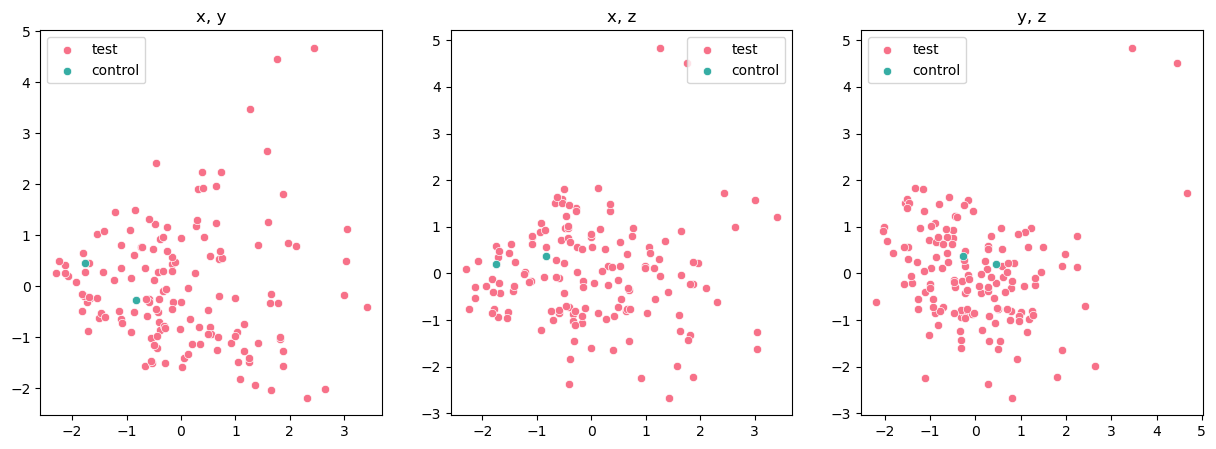

In [159]:
x, y, z = pca_mols.T
sns.set_palette("husl", n_colors=2)
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
axes[0].set_title("x, y")
sns.scatterplot(x=x, y=y, ax=axes[0], legend=True)
sns.scatterplot(x=x[control_idx], y=y[control_idx], ax=axes[0], legend=True)
axes[0].legend(["test", "control"])
axes[1].set_title("x, z")
sns.scatterplot(x=x, y=z, ax=axes[1])
sns.scatterplot(x=x[control_idx], y=z[control_idx], ax=axes[1], legend=True)
axes[1].legend(["test", "control"])
axes[2].set_title("y, z")
sns.scatterplot(x=y, y=z, ax=axes[2])
sns.scatterplot(x=y[control_idx], y=z[control_idx], ax=axes[2], legend=True)
axes[2].legend(["test", "control"])
plt.show()

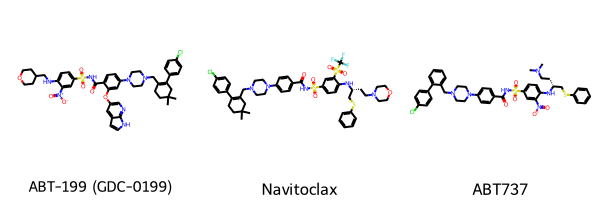

In [175]:
PandasTools.FrameToGridImage(sm_df[np.logical_or(y > 3, z > 4)], column="mol", legendsCol="sm_name")

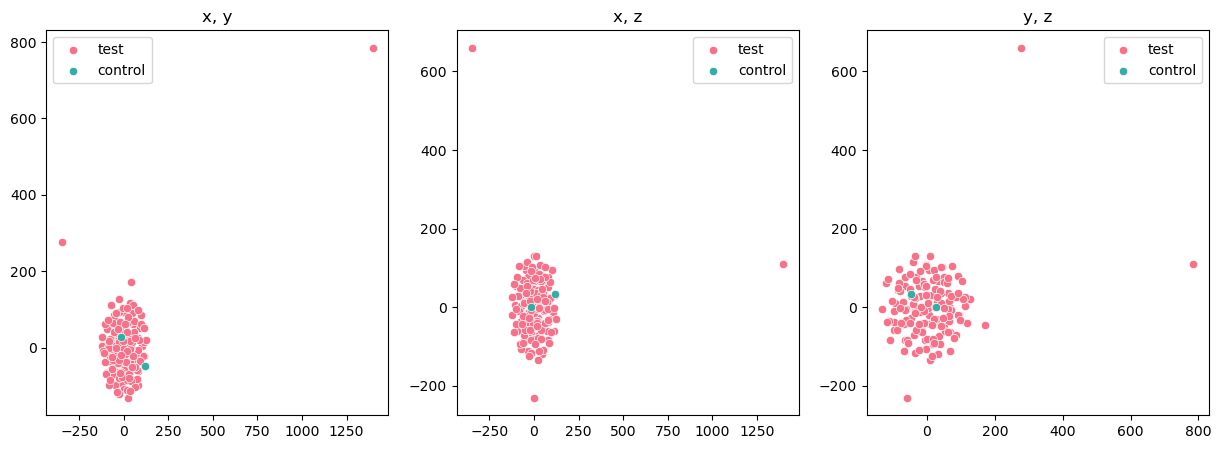

In [176]:
tsne = TSNE(n_components=3)
tsne_mols = tsne.fit_transform(mol_fps_array)

x, y, z = tsne_mols.T
sns.set_palette("husl", n_colors=2)
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
axes[0].set_title("x, y")
sns.scatterplot(x=x, y=y, ax=axes[0], legend=True)
sns.scatterplot(x=x[control_idx], y=y[control_idx], ax=axes[0], legend=True)
axes[0].legend(["test", "control"])
axes[1].set_title("x, z")
sns.scatterplot(x=x, y=z, ax=axes[1])
sns.scatterplot(x=x[control_idx], y=z[control_idx], ax=axes[1], legend=True)
axes[1].legend(["test", "control"])
axes[2].set_title("y, z")
sns.scatterplot(x=y, y=z, ax=axes[2])
sns.scatterplot(x=y[control_idx], y=z[control_idx], ax=axes[2], legend=True)
axes[2].legend(["test", "control"])
plt.show()

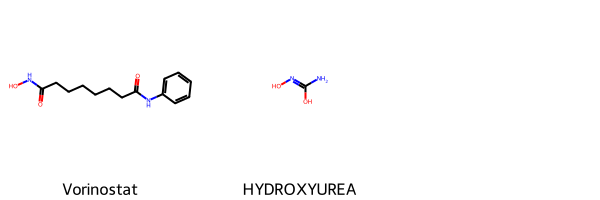

In [177]:
PandasTools.FrameToGridImage(sm_df[np.logical_or(y > 180, z > 200, x > 250)], column="mol", legendsCol="sm_name")

#### Descriptors...

In [178]:
dlist = Descriptors.descList
all_descs = {}
for name, method in dlist:
    descs = [method(x) for x in sm_df["mol"]]
    all_descs[name] = descs

descs_df = pd.DataFrame(all_descs)
mol_descs_array = np.array(list(all_descs.values())).T
control_idx = sm_df[sm_df["control"]==True].reset_index().index

In [179]:
(descs_df.std() / descs_df.mean()).describe()

count    184.000000
mean       2.057066
std        2.530530
min       -1.389638
25%        0.394639
50%        0.957048
75%        2.768311
max       12.083046
dtype: float64

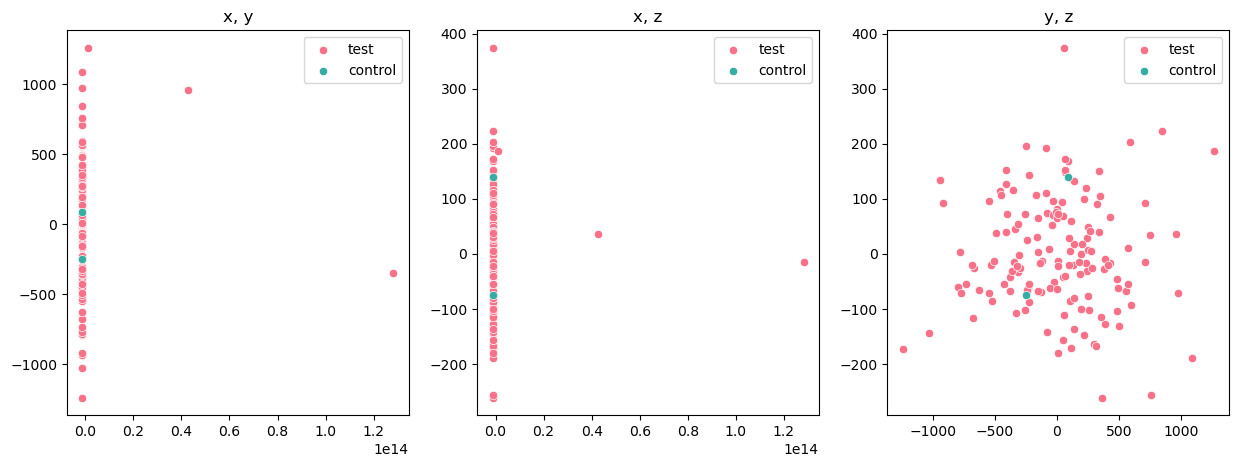

In [180]:
pca = PCA(n_components=3)
pca_mols = pca.fit_transform(mol_descs_array)

x, y, z = pca_mols.T
sns.set_palette("husl", n_colors=2)
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
axes[0].set_title("x, y")
sns.scatterplot(x=x, y=y, ax=axes[0], legend=True)
sns.scatterplot(x=x[control_idx], y=y[control_idx], ax=axes[0], legend=True)
axes[0].legend(["test", "control"])
axes[1].set_title("x, z")
sns.scatterplot(x=x, y=z, ax=axes[1])
sns.scatterplot(x=x[control_idx], y=z[control_idx], ax=axes[1], legend=True)
axes[1].legend(["test", "control"])
axes[2].set_title("y, z")
sns.scatterplot(x=y, y=z, ax=axes[2])
sns.scatterplot(x=y[control_idx], y=z[control_idx], ax=axes[2], legend=True)
axes[2].legend(["test", "control"])
plt.show()

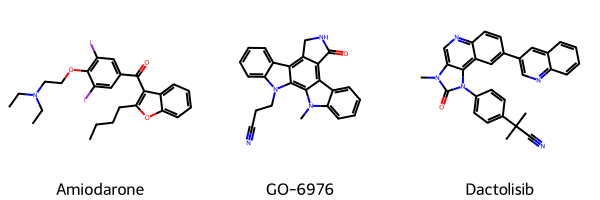

In [181]:
PandasTools.FrameToGridImage(sm_df[np.logical_or(z < -200, z > 300, x > 0.2)], column="mol", legendsCol="sm_name")

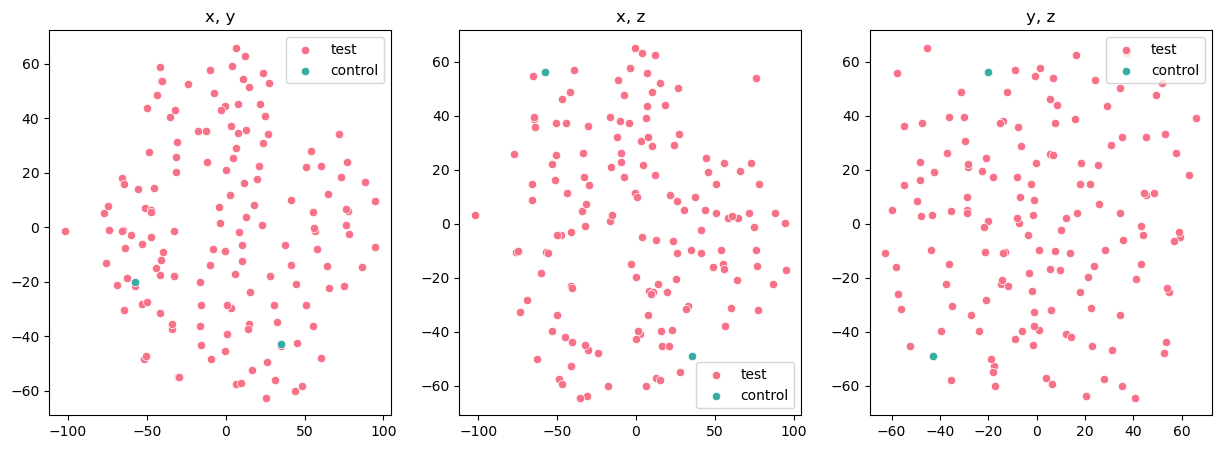

In [182]:
tsne = TSNE(n_components=3)
tsne_mols = tsne.fit_transform(mol_descs_array)

x, y, z = tsne_mols.T
sns.set_palette("husl", n_colors=2)
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
axes[0].set_title("x, y")
sns.scatterplot(x=x, y=y, ax=axes[0], legend=True)
sns.scatterplot(x=x[control_idx], y=y[control_idx], ax=axes[0], legend=True)
axes[0].legend(["test", "control"])
axes[1].set_title("x, z")
sns.scatterplot(x=x, y=z, ax=axes[1])
sns.scatterplot(x=x[control_idx], y=z[control_idx], ax=axes[1], legend=True)
axes[1].legend(["test", "control"])
axes[2].set_title("y, z")
sns.scatterplot(x=y, y=z, ax=axes[2])
sns.scatterplot(x=y[control_idx], y=z[control_idx], ax=axes[2], legend=True)
axes[2].legend(["test", "control"])
plt.show()